In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

BASE = Path("../")  # adjust if needed
PROC = BASE / "data" / "processed"

orders = pd.read_csv(PROC / "olist_full_orders.csv", low_memory=False, parse_dates=["order_purchase_timestamp"])
daily = pd.read_csv(PROC / "daily_revenue.csv", parse_dates=["date"])
customers = pd.read_csv(PROC / "customer_metrics.csv")



### Basic Data Inspection


In [18]:
orders.head()
orders.info()
orders.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  datetime64[ns]
 4   order_approved_at              118258 non-null  object        
 5   order_delivered_carrier_date   116360 non-null  object        
 6   order_delivered_customer_date  115037 non-null  object        
 7   order_estimated_delivery_date  118434 non-null  object        
 8   order_item_id                  117604 non-null  float64       
 9   product_id                     117604 non-null  object        
 10  seller_id                      117604 non-null  object        
 11  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,revenue,delivery_days,delay_days
count,118434,118434,118434,118434,118258,116360,115037,118434,117604.000000,117604,...,115906.000000,115906.000000,115906.000000,117584.000000,117584.000000,117584.00000,117584.000000,118434.000000,115037.000000,115037.000000
unique,99441,99441,8,NaN,90733,81018,95664,459,NaN,32951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,NaN,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,63,63,115038,NaN,63,63,63,656,NaN,536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-30 04:00:24.559636480,NaN,NaN,NaN,NaN,1.195920,NaN,...,48.767208,786.957302,2.207849,2114.281067,30.256872,16.63029,23.068394,139.881177,12.019237,-12.042073
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,NaN,1.000000,NaN,...,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000,0.000000,0.000000,-147.000000
25%,NaN,NaN,NaN,2017-09-11 12:53:55.249999872,NaN,NaN,NaN,NaN,1.000000,NaN,...,42.000000,347.000000,1.000000,300.000000,18.000000,8.00000,15.000000,54.850000,6.000000,-17.000000
50%,NaN,NaN,NaN,2018-01-17 17:57:56.500000,NaN,NaN,NaN,NaN,1.000000,NaN,...,52.000000,601.000000,1.000000,700.000000,25.000000,13.00000,20.000000,91.260000,10.000000,-13.000000
75%,NaN,NaN,NaN,2018-05-03 19:05:01,NaN,NaN,NaN,NaN,1.000000,NaN,...,57.000000,985.000000,3.000000,1800.000000,38.000000,20.00000,30.000000,157.300000,15.000000,-7.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,NaN,NaN,NaN,21.000000,NaN,...,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000,6929.310000,209.000000,188.000000


In [19]:
daily.head()
daily.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             634 non-null    datetime64[ns]
 1   total_revenue    634 non-null    float64       
 2   orders_count     634 non-null    int64         
 3   avg_order_value  634 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 19.9 KB


### Sales Trend Analysis

##### Daily Revenue Trend

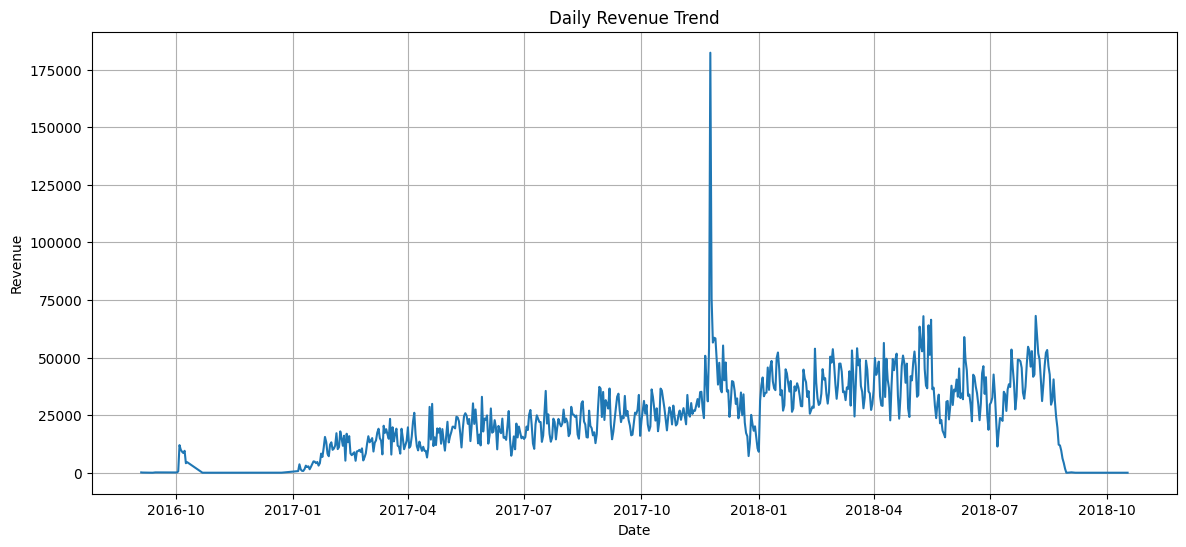

In [20]:
plt.figure(figsize=(14,6))
plt.plot(daily['date'], daily['total_revenue'])
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


##### Orders Per Day

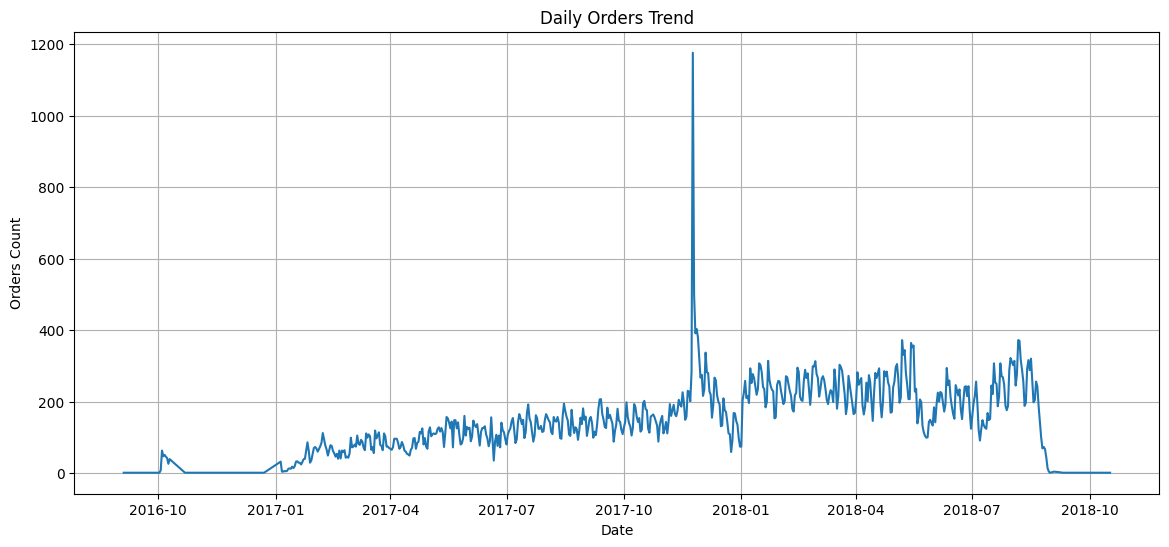

In [21]:
plt.figure(figsize=(14,6))
plt.plot(daily['date'], daily['orders_count'])
plt.title("Daily Orders Trend")
plt.xlabel("Date")
plt.ylabel("Orders Count")
plt.grid(True)
plt.show()


## Monthly Revenue & Seasonality


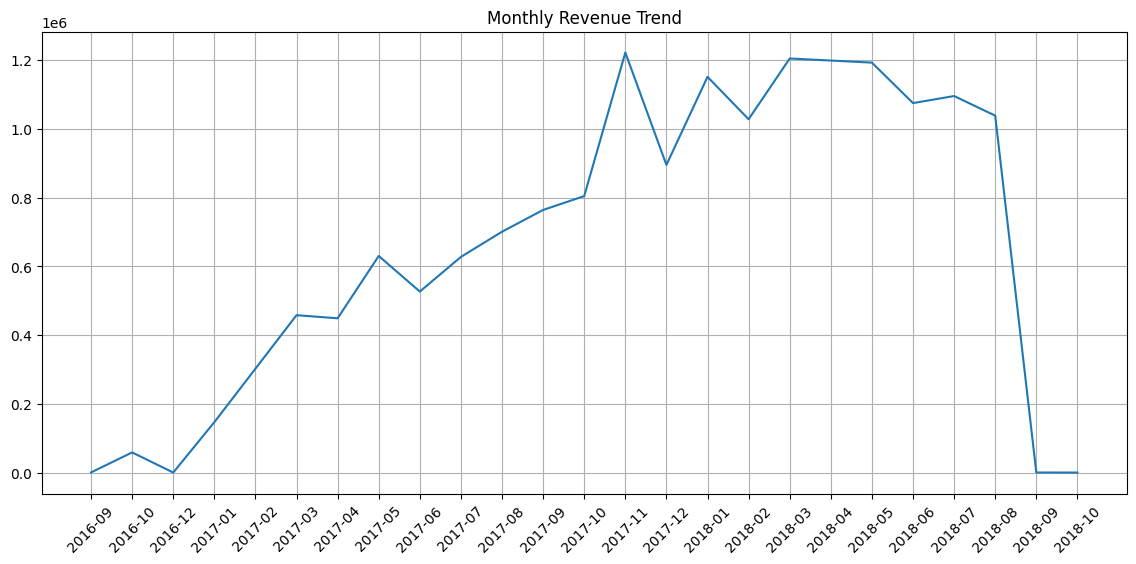

In [22]:
orders['month'] = orders['order_purchase_timestamp'].dt.to_period("M")
monthly_revenue = orders.groupby("month")["revenue"].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(monthly_revenue['month'].astype(str), monthly_revenue['revenue'])
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Top 10 Product Categories

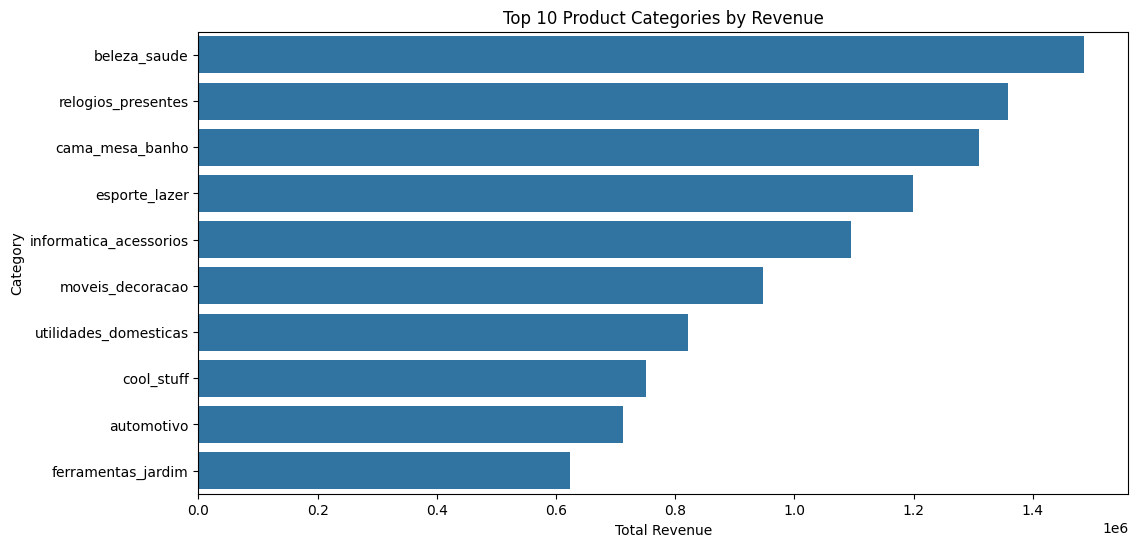

In [23]:
top_categories = orders.groupby("product_category_name")["revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.show()


## Delivery Performance (BA-critical)

### Delivery Days Distribution

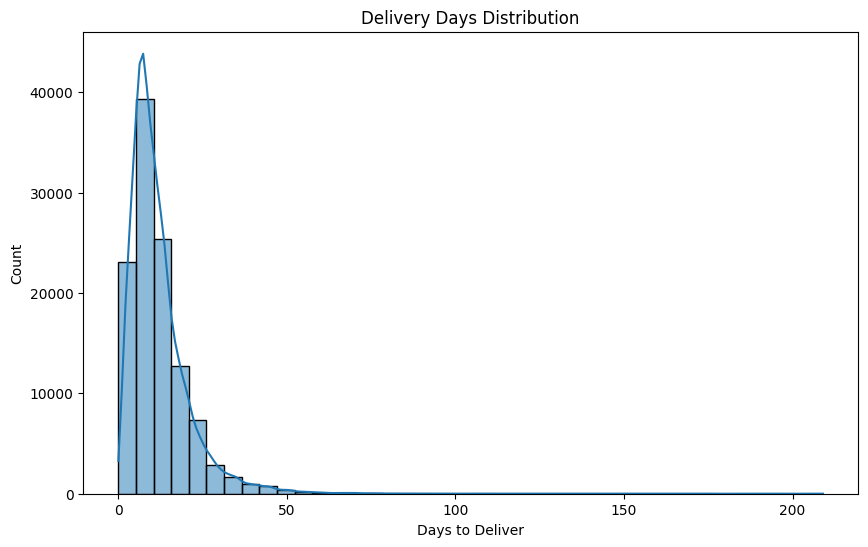

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(orders["delivery_days"].dropna(), bins=40, kde=True)
plt.title("Delivery Days Distribution")
plt.xlabel("Days to Deliver")
plt.show()


### Delay Days

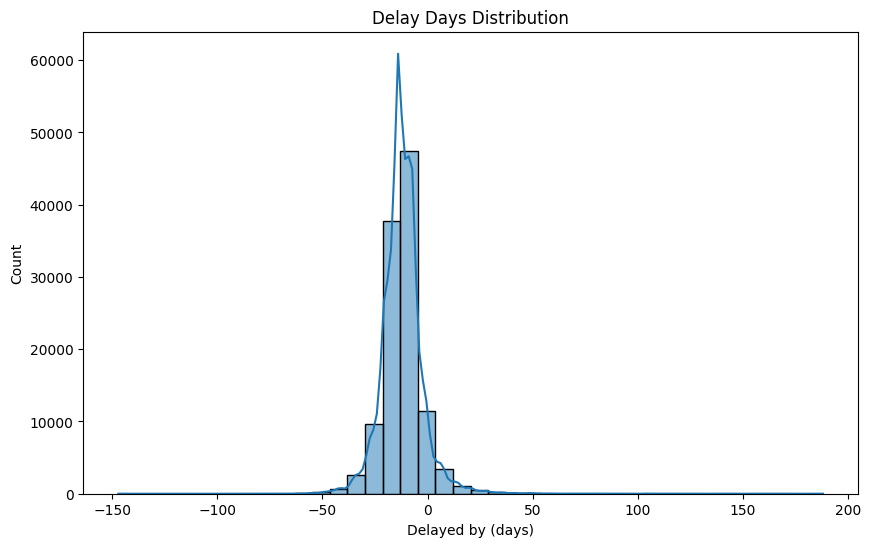

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(orders["delay_days"].dropna(), bins=40, kde=True)
plt.title("Delay Days Distribution")
plt.xlabel("Delayed by (days)")
plt.show()


# Payment Method Analysis

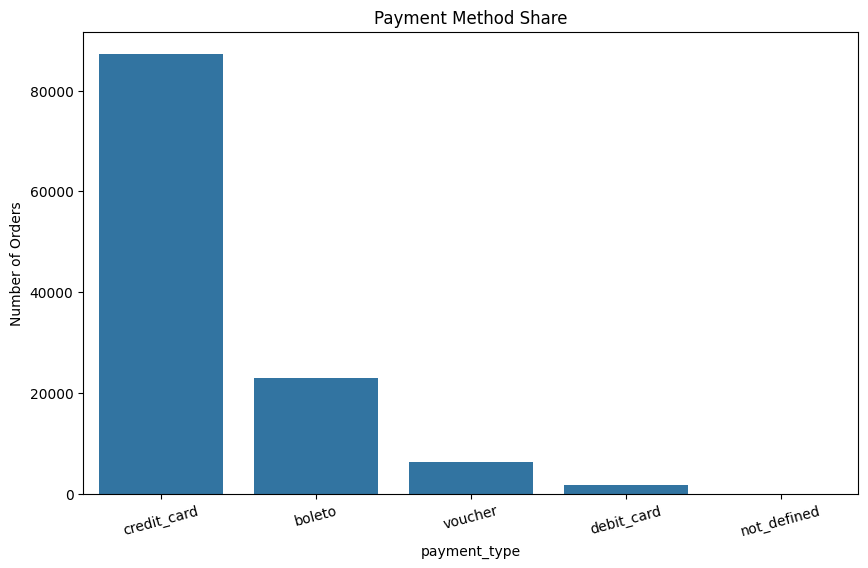

In [26]:
payments = orders.groupby("payment_type")["order_id"].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=payments.index, y=payments.values)
plt.title("Payment Method Share")
plt.ylabel("Number of Orders")
plt.xticks(rotation=15)
plt.show()


# Customer Location Analysis

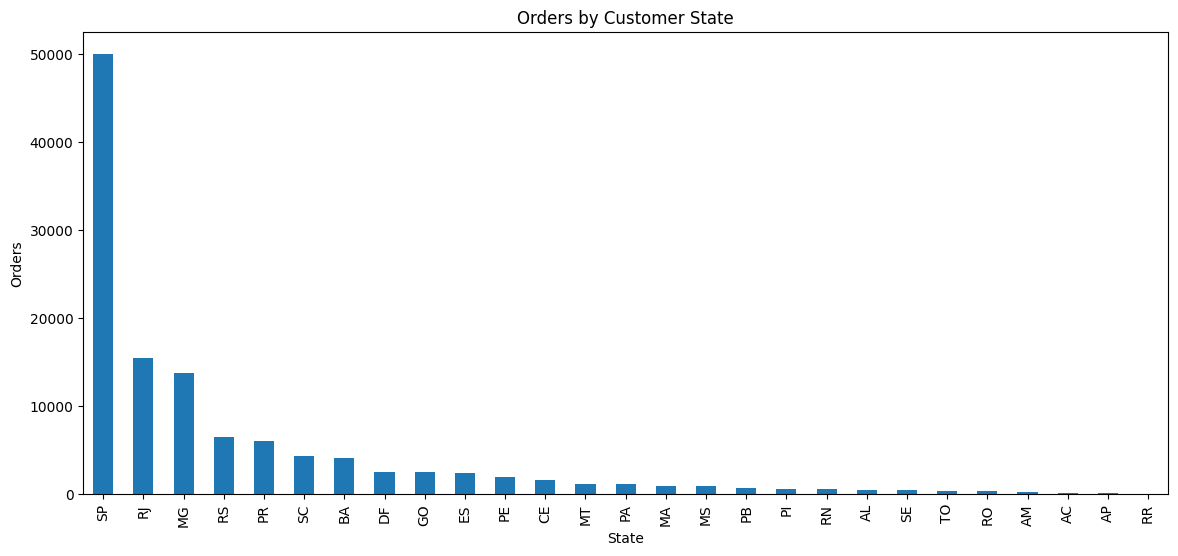

In [27]:
orders['customer_state'].value_counts().plot(kind='bar', figsize=(14,6))
plt.title("Orders by Customer State")
plt.xlabel("State")
plt.ylabel("Orders")
plt.show()


# RFM Metrics (Customer Analytics)

### Recency distribution

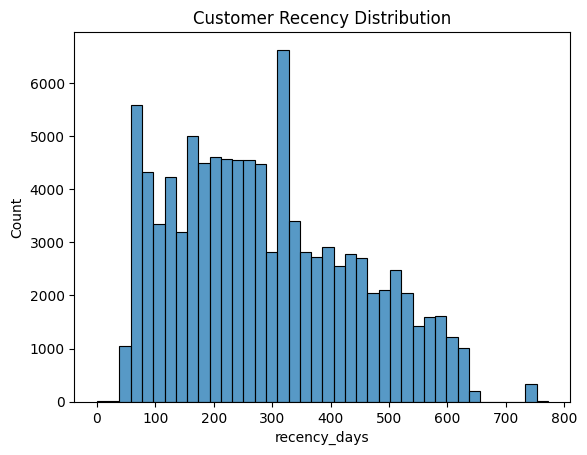

In [28]:
sns.histplot(customers['recency_days'], bins=40)
plt.title("Customer Recency Distribution")
plt.show()


### Frequency distribution

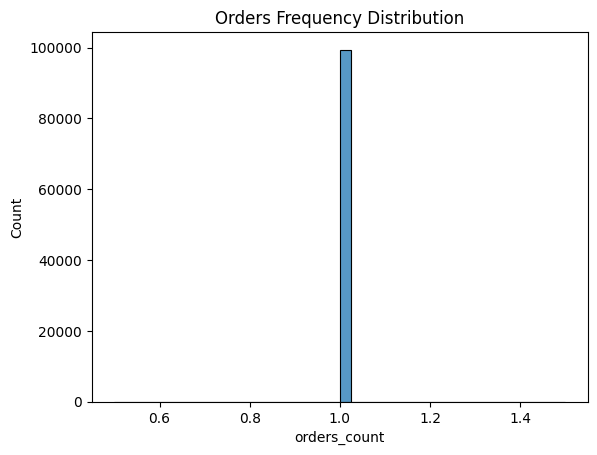

In [29]:
sns.histplot(customers['orders_count'], bins=40)
plt.title("Orders Frequency Distribution")
plt.show()


### Monetary distribution

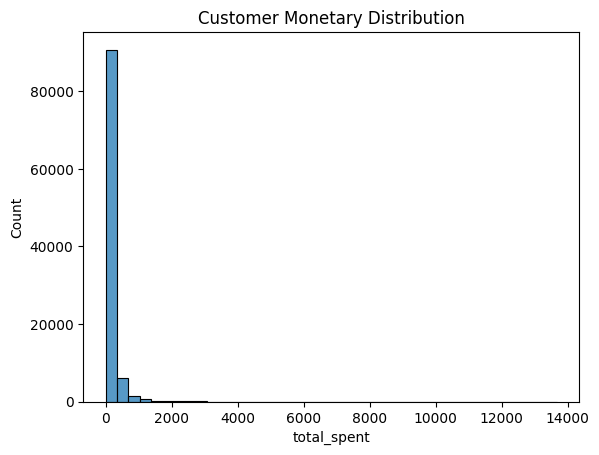

In [30]:
sns.histplot(customers['total_spent'], bins=40)
plt.title("Customer Monetary Distribution")
plt.show()


## Key Insights Summary

In [31]:
print("📌 KEY BUSINESS INSIGHTS:")

print(f"Total revenue: {daily['total_revenue'].sum():,.2f}")
print(f"Average Order Value (AOV): {daily['avg_order_value'].mean():.2f}")
print(f"Total customers: {customers['customer_id'].nunique()}")
print(f"Average delivery time: {orders['delivery_days'].mean():.2f} days")
print(f"Top category by revenue: {top_categories.index[0]}")


📌 KEY BUSINESS INSIGHTS:
Total revenue: 16,566,687.31
Average Order Value (AOV): 136.94
Total customers: 99441
Average delivery time: 12.02 days
Top category by revenue: beleza_saude
